# Stock Portfolio Tracker

In [41]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import math
#df=pd.DataFrame({'symbol':'GOOGL','start':'2024-06-10','end':'2024-06-17'},index=[0])
df=pd.read_csv(r"C:\Users\RJ\Desktop\Anusurya document\GOOGL.csv")
df

,Date,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL
0,19-08-2004,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,20-08-2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,23-08-2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,24-08-2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,25-08-2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,18-03-2022,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,21-03-2022,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,22-03-2022,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,23-03-2022,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [ ]:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(['Date'],inplace=True,axis=1)
df

In [43]:
df

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [18]:
daily_simple_returns=df.pct_change(1)
daily_simple_returns

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,0.010100,0.048241,0.047311,0.079430,0.079430,-0.488697
2004-08-23,0.096426,0.040337,0.085075,0.010064,0.010064,-0.200497
2004-08-24,0.004424,-0.016567,-0.050252,-0.041408,-0.041408,-0.164810
2004-08-25,-0.056454,-0.032258,0.002993,0.010775,0.010775,-0.397363
...,...,...,...,...,...,...
2022-03-18,0.002069,0.016136,0.000556,0.017084,0.017084,0.573097
2022-03-21,0.020528,0.005916,0.013867,-0.000176,-0.000176,-0.396518
2022-03-22,-0.000455,0.029186,0.014982,0.027674,0.027674,0.322898
2022-03-23,0.019111,-0.010362,0.012737,-0.011386,-0.011386,-0.291357


In [44]:
annual_returns=daily_simple_returns.mean()*252
annual_returns

ATVI    0.275202
ADBE    0.262192
AMD     0.270439
ALXN    0.274963
ALGN    0.274963
dtype: float64

In [45]:
import math
annual_risks=daily_simple_returns.std()*math.sqrt(252)
annual_risks

ATVI    0.306259
ADBE    0.265767
AMD     0.283816
ALXN    0.302935
ALGN    0.302935
dtype: float64

In [46]:
sorted_annualized_returns=annual_returns.sort_values(ascending=False)
sorted_annualized_returns

ATVI    0.275202
ALXN    0.274963
ALGN    0.274963
AMD     0.270439
ADBE    0.262192
dtype: float64

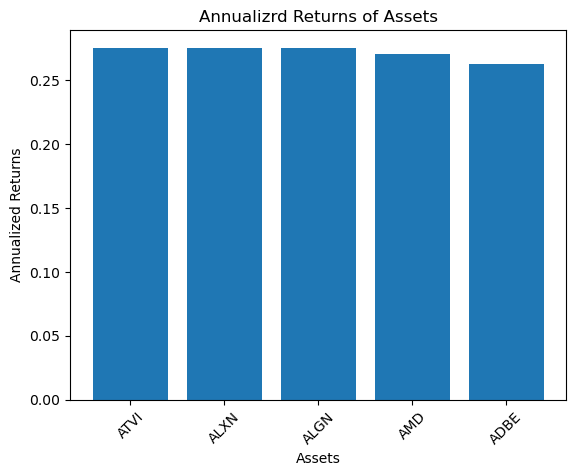

In [47]:
plt.bar(sorted_annualized_returns.index,sorted_annualized_returns)
plt.ylabel('Annualized Returns')
plt.xlabel('Assets')
plt.xticks(rotation=45)
plt.title('Annualizrd Returns of Assets')
plt.show()

In [48]:
df2=pd.DataFrame()
df2['Expected Annual Returns']=annual_returns
df2['Expected Annual Risks']=annual_risks
df2['Company Tickers']=df2.index
df2['Ratio']=df2['Expected Annual Returns']/df2['Expected Annual Risks']
df2.sort_values(by='Ratio',axis=0,ascending=False,inplace=False)

,Expected Annual Returns,Expected Annual Risks,Company Tickers,Ratio
ADBE,0.262192,0.265767,ADBE,0.986548
AMD,0.270439,0.283816,AMD,0.952866
ALXN,0.274963,0.302935,ALXN,0.907663
ALGN,0.274963,0.302935,ALGN,0.907663
ATVI,0.275202,0.306259,ATVI,0.898591


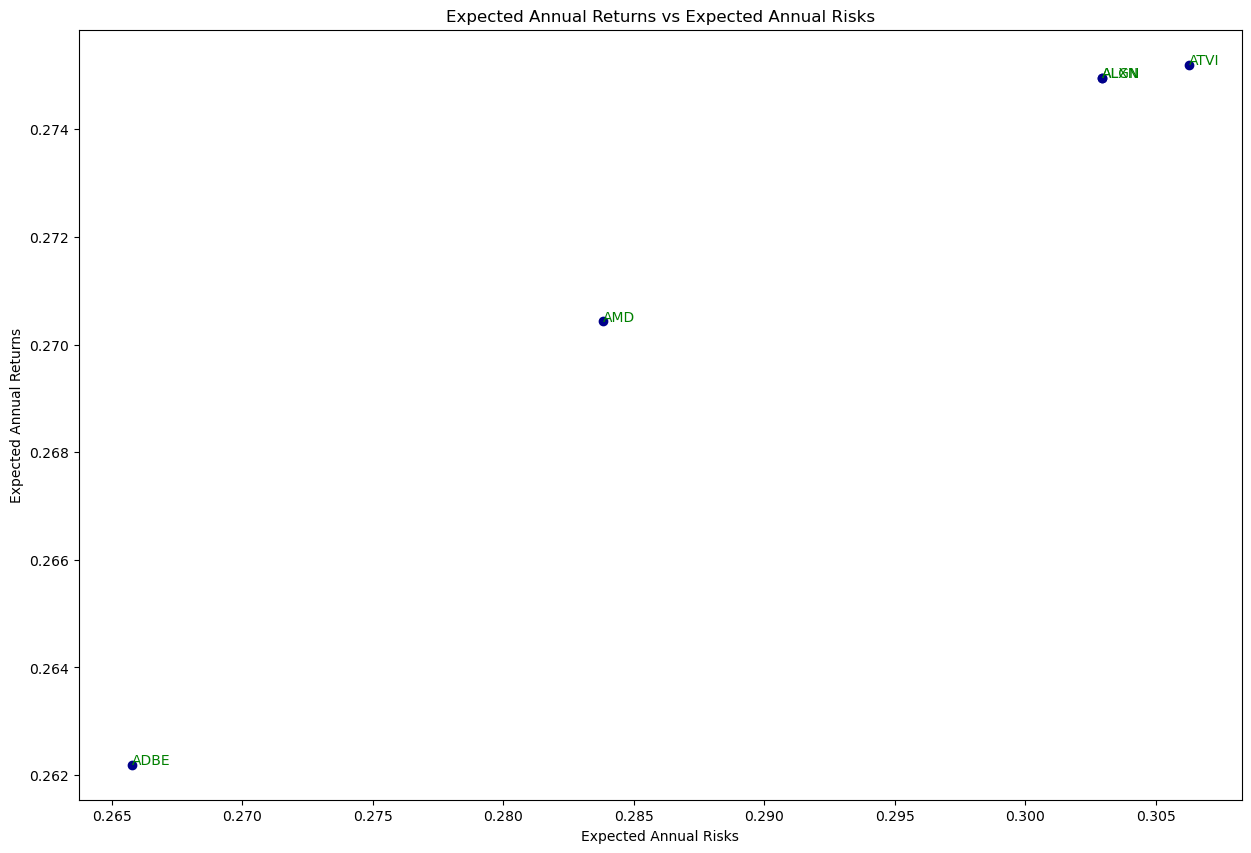

In [49]:
fig, ax=plt.subplots(figsize=(15,10))
plt.title('Expected Annual Returns vs Expected Annual Risks')
ax.scatter(df2['Expected Annual Risks'],df2['Expected Annual Returns'],c='DarkBlue')
ax.set_xlabel('Expected Annual Risks')
ax.set_ylabel('Expected Annual Returns')
for idx,row in df2.iterrows():
  ax.annotate(row['Company Tickers'],(row['Expected Annual Risks'],row['Expected Annual Returns']),c='green')
plt.show()

In [50]:
row='ADBE'
df2.loc[(df2['Expected Annual Returns']>df2['Expected Annual Returns'][row])&(df2['Expected Annual Risks']<df2['Expected Annual Returns'][row])]

,Expected Annual Returns,Expected Annual Risks,Company Tickers,Ratio


In [51]:
remove_asset_list=[]
for ticker in df2['Company Tickers'].values:
  no_better_assets_exists=df2.loc[(df2['Expected Annual Returns']>df2['Expected Annual Returns'][ticker])]
if any(no_better_assets_exists):
  remove_asset_list.append(ticker)

In [52]:
remove_asset_list

['ALGN']

In [53]:
df2.drop(remove_asset_list, inplace=True)
df2

,Expected Annual Returns,Expected Annual Risks,Company Tickers,Ratio
ATVI,0.275202,0.306259,ATVI,0.898591
ADBE,0.262192,0.265767,ADBE,0.986548
AMD,0.270439,0.283816,AMD,0.952866
ALXN,0.274963,0.302935,ALXN,0.907663


In [54]:
assets=df2.index
num_assets=len(assets)

In [55]:
num_assets

4

In [59]:
#calculate the new simple daily returns
daily_simple_returns=df[assets].pct_change(1)
#calculate the new annual returns
annual_returns=daily_simple_returns.mean()*252

In [57]:
#create weights
n=1.0/float(num_assets)
weights=[n]*num_assets
weights=np.array(weights)

In [58]:
#show the weights
weights

array([0.25, 0.25, 0.25, 0.25])

In [60]:
#calculate and show the covariance matrix
cov_matrix_annual=daily_simple_returns.cov()*252
cov_matrix_annual

,ATVI,ADBE,AMD,ALXN
ATVI,0.093795,0.061181,0.062719,0.033012
ADBE,0.061181,0.070632,0.057434,0.058127
AMD,0.062719,0.057434,0.080552,0.061884
ALXN,0.033012,0.058127,0.061884,0.091770


In [61]:
#calculate and show the annual variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.06284139487275935

In [62]:
#calculate the show the portfolio annual volatility or risk
port_volatility=np.sqrt(port_variance)
port_variance

0.06284139487275935

In [63]:
#calculate and show the expected returns
port_returns_expected=np.sum(weights*annual_returns)
#show the expected returns as a percentage
print(str(round(port_returns_expected*100, 2))+'%')

27.07%
